# Time-dependent PDEs in FEniCS

## Time is crucial for many processes

In [3]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/CCmTY0PKGDs" frameborder="0" allowfullscreen></iframe>')

## The heat equation is the "Hello world" example of a time-dependent PDE

We will solve the simplest extension of the Poisson problem into
the time domain, the **heat equation**:

$$
\frac{\partial u}{\partial t} + D u_{xx} = f  \qquad \text{ for } x \in \Omega \text{ and for } t \in [0, T], \\
u = g  \qquad \text{ for } x \in \partial \Omega \text{ and } t \in [0, T], \\
u = u^0 \qquad \text{ for } x \in \Omega \text{ and } t = 0.
$$

with $D \in \mathbb R$. $\Omega$ denotes the spatial domain and $\partial \Omega$ the domain boundary. For example for $\Omega = [-L, L]$, the boundary $\partial \Omega$ consists of the two points $-L$ and $L$. We start the simulation at time $t=0$ until the final time $T$.


The solution $u = u(x, t)$, the right-hand side $f = f (x, t)$ and the
boundary value $g = g(x, t)$ may vary in space $(x)$
and time (t). The initial value $u_0$ is a function of space only.

Let's see how a 2D solution of this problem looks like:

In [2]:
## An example solution in 2D
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/TvlIfSlLB0c" frameborder="0" allowfullscreen></iframe>')

**Question**: Which kind of initial/boundary conditions were used in the above simulation?

## Time-discretization of the heat equation

FEniCS cannot direct solve time-dependent equations. We therefore must approximate the time-derivative $\frac{\partial u}{\partial t}$, that is discretise in time. This will lead to a sequence of non-time dependent PDEs, which we can solve with FEniCS. 


Our goal is to compute the solution at a set of discrete time-levels $0 = t^0 < t^1 < ... < T^N = T$. 
The variables at the n'th time-levels will denoted with a superscript $n$:

$$ u^n \approx u(t^n) \\
f^n = f(t^n)
$$

We discretize in time using the **implicit Euler** method.

$$ \frac{\partial u}{\partial t} (t^n) \approx \frac{u^n - u^{n-1}}{\Delta t} $$
This leads to the semi-discretization of the heat equation ("semi"-discretisation because we have discretised in time, but not yet in space):
$$
u^n - u^{n-1} - u^n_{xx} = \Delta t f_n 
$$


### Time stepping algorithm for the heat equation

1. Start with $u^0$ and choose a timestep ∆t > 0.
2. For $n = 1, 2, ...$ solve for $u^n$: 
 
   $u^n − \Delta t u^n_{xx} = u^{n-1} + \Delta t f^n$

## Variational problem for the heat equation

To obtain the fully-discretised system, we derive the variational formulation of the semi-discretised system:

Find $u^n, n=1, ..., N$ such that 
$$
 a(u^n, v) = L^n(v)  \quad \text{ for all } v
$$
where 
$$
  a(u^n, v) = \int_\Omega u^nv + \Delta t u_x v_x \text{d}x\\
  L^n(v) = \int_\Omega u^{n-1}v + \Delta t f^nv \text{d}x
$$
Note that the bilinear form $a(u, v)$ is constant while the linear
form $L^n$ depends on $n$.

Building a system of linear equations from the weak form
----------------------------------------------------------------
For sake of semplicity we consider a unit length rod and Dirichlet condition on both ends. We assume that we discretize the rod using 6 points and 5 intervals.

Similarly to the stationary case, we can build a linear system from our equation. The main difference is that at each time step this system needs to be solved and the right hand side needs to be updated.

On the left had side we have an additional term with respect to the stationary case. Recalling that we decompose $u(x,t)$ as a series $u = \sum_i u_i(t) \phi_i(x),$ and that $(\phi_i)_x$ is $\frac{x-x_{i-1}}{h}$ between $x_{i-1}$ and $x_i$, $\frac{x_{i+1}-x}{h}$ between $x_i$ and $x_{i+1}$, and $0$ otherwise. Therefore, $(\phi_i)_x$ is $\frac{1}{h}$ between $x_{i-1}$ and $x_i$, $\frac{-1}{h}$ between $x_i$ and $x_{i+1}$, and $0$ otherwise. So,the integral $$
\int\limits_0^1 (\phi_i) \cdot (\phi_j) + \Delta t (\phi_i)_x \cdot (\phi_j)_x \text{d}x$$
is:
* $\frac{2h}{3} + \frac {2 \Delta t}{h}$ when $i=j$ 
* $\frac{h}{6} - \frac{\Delta t} {h}$ when $i = j \pm 1$ 
* $0$ when $i, j$ are more than 1 apart. 

On the right hand side we have to assemble the term $$\int\limits_0^1 (u_i^{n-1} + \Delta t f_i^n) \phi_i(x)$$ for $i = 2,\dots,5.$ 
The integral $\int\limits_0^1 \phi_i(x) = h.$ For $i=0$ and $i = 6$ the solution is given by the boundary conditions.
We can put all the terms together in a matrix form.

 $$\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 \\
    \frac{h}{6} - \frac{\Delta t} {h} & \frac{2h}{3} + \frac {2 \Delta t}{h} & \frac{h}{6} - \frac{\Delta t} {h}& 0 & 0 & 0\\
    0 & \frac{h}{6} - \frac{\Delta t} {h}& \frac{2h}{3} + \frac {2 \Delta t}{h} & \frac{h}{6} - \frac{\Delta t} {h}& 0 & 0 \\
    0 & 0 & \frac{h}{6} - \frac{\Delta t} {h} & \frac{2h}{3} + \frac {2 \Delta t}{h} & \frac{h}{6} - \frac{\Delta t} {h} & 0 \\
    0 & 0 & 0 & \frac{h}{6} - \frac{\Delta t} {h} & \frac{2h}{3} + \frac {2 \Delta t}{h} & \frac{h}{6} - \frac{\Delta t} {h} \\
    0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix}
    u_0 \\[2.2pt]
    u_1 \\[2.2pt]
    u_2 \\[2.2pt]
    u_3 \\[2.2pt]
    u_4 \\[2.2pt]
    u_5
\end{bmatrix} = \begin{bmatrix}
    1 \\[2.2pt]
    0 \\[2.2pt]
    0 \\[2.2pt]
    0 \\[2.2pt]
    0 \\[2.2pt]
    0
\end{bmatrix} + \begin{bmatrix}
    0 \\[2.2pt]
    h (u_1^{n-1} + \Delta t f_1^{n}) \\[2.2pt]
    h (u_2^{n-1} + \Delta t f_2^{n}) \\[2.2pt]
    h (u_3^{n-1} + \Delta t f_3^{n}) \\[2.2pt]
    h (u_4^{n-1} + \Delta t f_4^{n}) \\[2.2pt]
    0
\end{bmatrix}$$


## Detailed time-stepping algorithm for the heat equation

The following sceleton shows how to solve a time-dependent problem in FEniCS:

* Define the mesh, functions-spaces and Dirichlet boundary conditions
* Compute $u_0$ as the projection of the given initial value
* Define the forms $a$ and $L$
* Assemble the matrix $A$ from the bilinear form $a$
* Set $t$ to $\Delta t$
* **while $t < T$ do**
    * Assemble the vector $b$ from the linear form $L$
    * Apply the boundary condition
    * Solve the linear system $AU = b$ for $U$ and store in $u_1$
    * Set $t$ to $t + \Delta t$
    * Set $u_0$ to $u_1$ (get ready for next step)
* **end while**

## Some implementation tipps - let's started with setting up a basic FEniCS environment

In [8]:
%matplotlib inline
from fenics import *
import pylab
parameters['plotting_backend'] = 'matplotlib'

mesh = UnitIntervalMesh(100)
V = FunctionSpace(mesh, "CG", 1)

ImportError: /home/eleonora/anaconda2/lib/python2.7/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `CXXABI_1.3.8' not found (required by /home/eleonora/.hashdist/bld/profile/z433m4754yzj/lib/python2.7/site-packages/dolfin/cpp/_common.so)

## Handling time-dependent expressions

We need to define a time-dependent expression for the boundary value:

In [4]:
alpha = 3
beta = 1.2
g = Expression ("1+alpha*x[0]*x[0]+beta*t", 
                alpha=alpha , beta=beta , t=0, degree=2)

Updating parameter values:

In [5]:
g.t = 2.0

## Projection and interpolation

We need to project the initial value into a `fenics.Function`:

(3, 7)

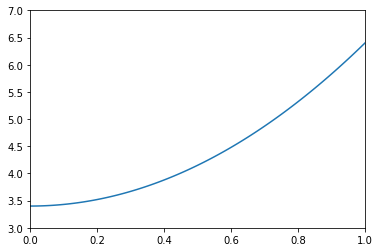

In [6]:
u0 = project(g, V)
p = plot(u0)
# The next two lines are required to plot the function correctly
p[0].axes.set_xlim([0, 1])
p[0].axes.set_ylim([3, 7])

We can also interpolate the initial value:

(3, 7)

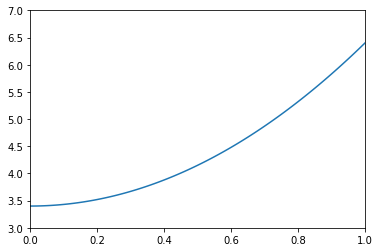

In [7]:
u0 = interpolate (g, V)
p = plot(u0)
p[0].axes.set_xlim([0, 1])
p[0].axes.set_ylim([3, 7])

## A closer look at solve

For linear problems, this code Python code
```python
solve(a == L, u, bcs)
```
is equivalent to this
```python 
# Assembling a bilinear form yields a matrix
A = assemble(a)
# Assembling a linear form yields a vector
b = assemble(L)
# Applying boundary condition info to system
for bc in bcs:
    bc.apply(A , b)
    # Solve Ax = b
    solve (A, u.vector(), b)
```

## Implementing the variational problem

In [4]:
# The time-step
dt = 0.3

# Project the intial condition
u0 = project (g, V)

# Define a variable to store the solution at the previous time-step
u1 = Function(V)

# Define a source term
f = Constant(beta-2-2*alpha)

# Define the Dirichlet boundary condition
bc = DirichletBC (V, g, "on_boundary")

# Code the variational formulation
u = TrialFunction(V)
v = TestFunction(V)
a = u*v*dx + dt*inner(grad(u), grad(v))*dx
L = u0*v*dx + dt*f*v*dx

# assemble only once , before time-stepping
A = assemble(a)
#verify that the assembled matrix actually looks as the one we showed before
print(A.array())
h = mesh.hmax()
print("h/6 - dt/h = ", h/6.0 - dt/h)
print("2h/3 + 2dt/h = ", 2*h/3.0 + 2*dt/h)

NameError: name 'project' is not defined

## Implementing the time-stepping loop

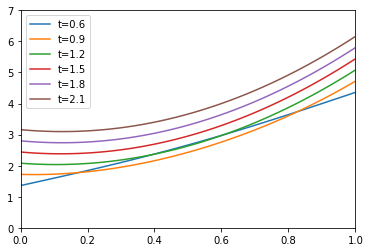

In [9]:
# Implement the time-loop
T = 2
t = dt
while t <= T:
    # Assemble the right hand side of the system (this changes at every timestep)
    b = assemble(L)
    
    # Update the time-level of the boundary expression
    g.t = t
    
    # Apply the boundary condition to the left and right hand side
    bc.apply(A, b)
    
    # Solve the linear system
    solve(A, u1.vector(), b)
    
    # Get ready for the next time-step
    t += dt
    u0.assign(u1)
    
    # Plot the solution
    p = plot(u0, label='t={}'.format(t))
    p[0].axes.set_xlim([0, 1])
    p[0].axes.set_ylim([0, 7])
    pylab.legend()

## The cable equations

The standard cable equation is a reaction-diffusion equation given by
$$
\frac{\partial u}{\partial t}  = \sigma u_{xx} + f(u, s)
$$
where $f(u, s)$ is a reaction term describing ionic fluxes across
the membrane.
* A linear $f(u)$ describes passive conductance through a leaky cable (dendrites).
* A cubic $f(u)$ gives the bistable equation with a propagating activation front.
* In general $f(u, s)$, where s is a vector describing the state of the cell membrane, typically governed by a system of ODEs.

## FEniCS challenge 1

Solve the linear, bistable cable equation on an interval $\Omega=[-L, L]$ in FEniCS 
$$
\frac{\partial u}{\partial t} = \sigma u_{xx} + f(u) \quad \text{ for } -L < x < L, \\
u_x = 0 \quad \text{ for } x = -L \text{ and } x = L,
$$
with 
* $f(u) = Au$,
* $A = -0.1$,
* $\sigma = 1.0$,
* $L = 100$.

Implement an implicit Euler time-stepping scheme and solve the problem from $t=0$ to $T=250$ with a timestep of $dt=2.5$. Use as initial condition

$$
\frac{1}{2} (1-\tanh(\sqrt{A/8\sigma)}(x+0.75L)))
$$
Create a plot of the solution on every 10th time-step. What happens if you change the value and sign of A? 